# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    ConfusionMatrixDisplay, f1_score, mean_absolute_error, 
    mean_squared_error, median_absolute_error, r2_score
)
import xgboost as xgb
import tensorflow as tf
import keras_tuner as kt

warnings.filterwarnings("ignore")


# Import data

In [2]:
df = pd.read_csv(r'/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')
print(len(df))
df = df.iloc[:10000]
print(len(df))
label_encoder = LabelEncoder()

# Encode the 'DRK_YN' column
df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])
# 1 : Yes , 0 : No

# Encode the 'sex' column
df['sex'] = label_encoder.fit_transform(df['sex'])
#1 : male , 0 : female

991346
10000


 > # ****Data Analysis****

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   height            10000 non-null  int64  
 3   weight            10000 non-null  int64  
 4   waistline         10000 non-null  float64
 5   sight_left        10000 non-null  float64
 6   sight_right       10000 non-null  float64
 7   hear_left         10000 non-null  float64
 8   hear_right        10000 non-null  float64
 9   SBP               10000 non-null  float64
 10  DBP               10000 non-null  float64
 11  BLDS              10000 non-null  float64
 12  tot_chole         10000 non-null  float64
 13  HDL_chole         10000 non-null  float64
 14  LDL_chole         10000 non-null  float64
 15  triglyceride      10000 non-null  float64
 16  hemoglobin        10000 non-null  float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,10000.0,0.53560,0.498756,0.0,0.0,1.0,1.0,1.0
age,10000.0,47.51050,14.193133,20.0,35.0,45.0,55.0,85.0
height,10000.0,162.28400,9.309512,135.0,155.0,160.0,170.0,190.0
weight,10000.0,63.21650,12.541426,35.0,55.0,60.0,70.0,130.0
waistline,10000.0,81.17203,9.657232,49.0,74.0,81.0,87.6,128.0
sight_left,10000.0,0.98297,0.616786,0.1,0.7,1.0,1.2,9.9
sight_right,10000.0,0.98482,0.623535,0.1,0.7,1.0,1.2,9.9
hear_left,10000.0,1.02900,0.167815,1.0,1.0,1.0,1.0,2.0
hear_right,10000.0,1.02850,0.166405,1.0,1.0,1.0,1.0,2.0
SBP,10000.0,122.63610,14.613153,75.0,112.0,121.0,131.0,230.0


In [5]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


****Search null nb****

In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

<Axes: >

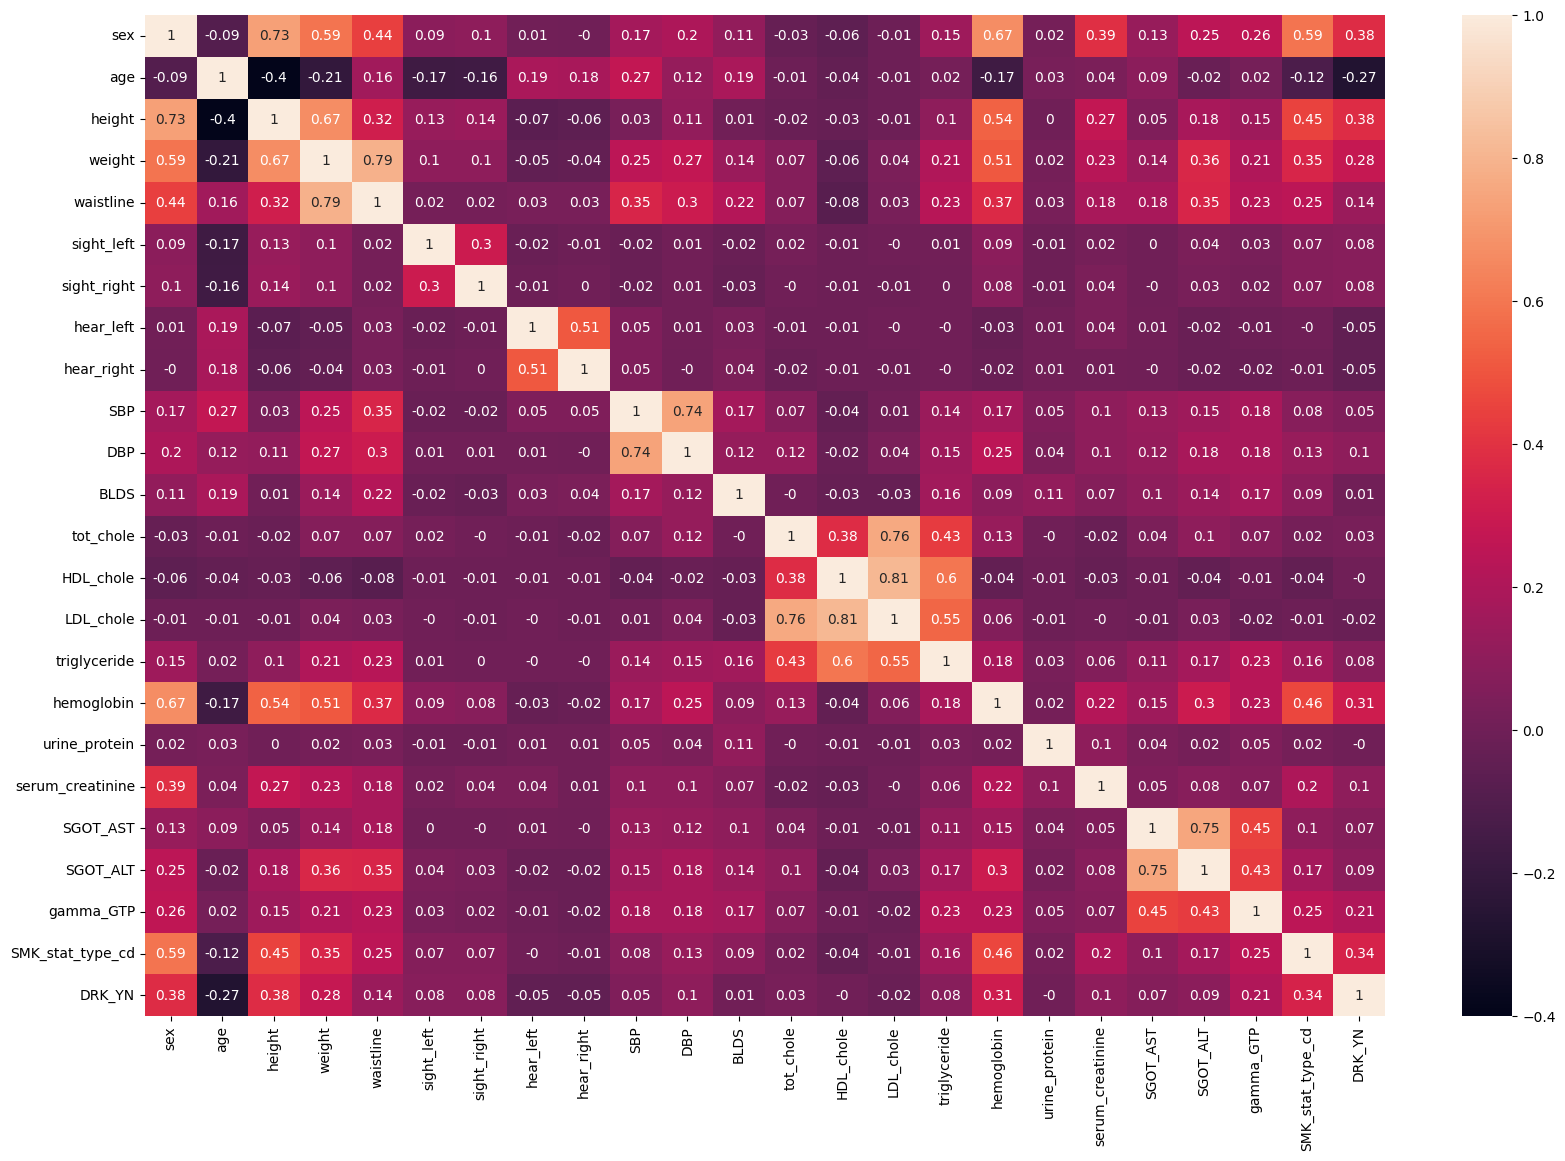

In [7]:
plt.figure(figsize = (20, 13))
sns.heatmap(round(df.corr(), 2), annot = True)

# Remove outliers

In [8]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns 
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2 

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))  

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

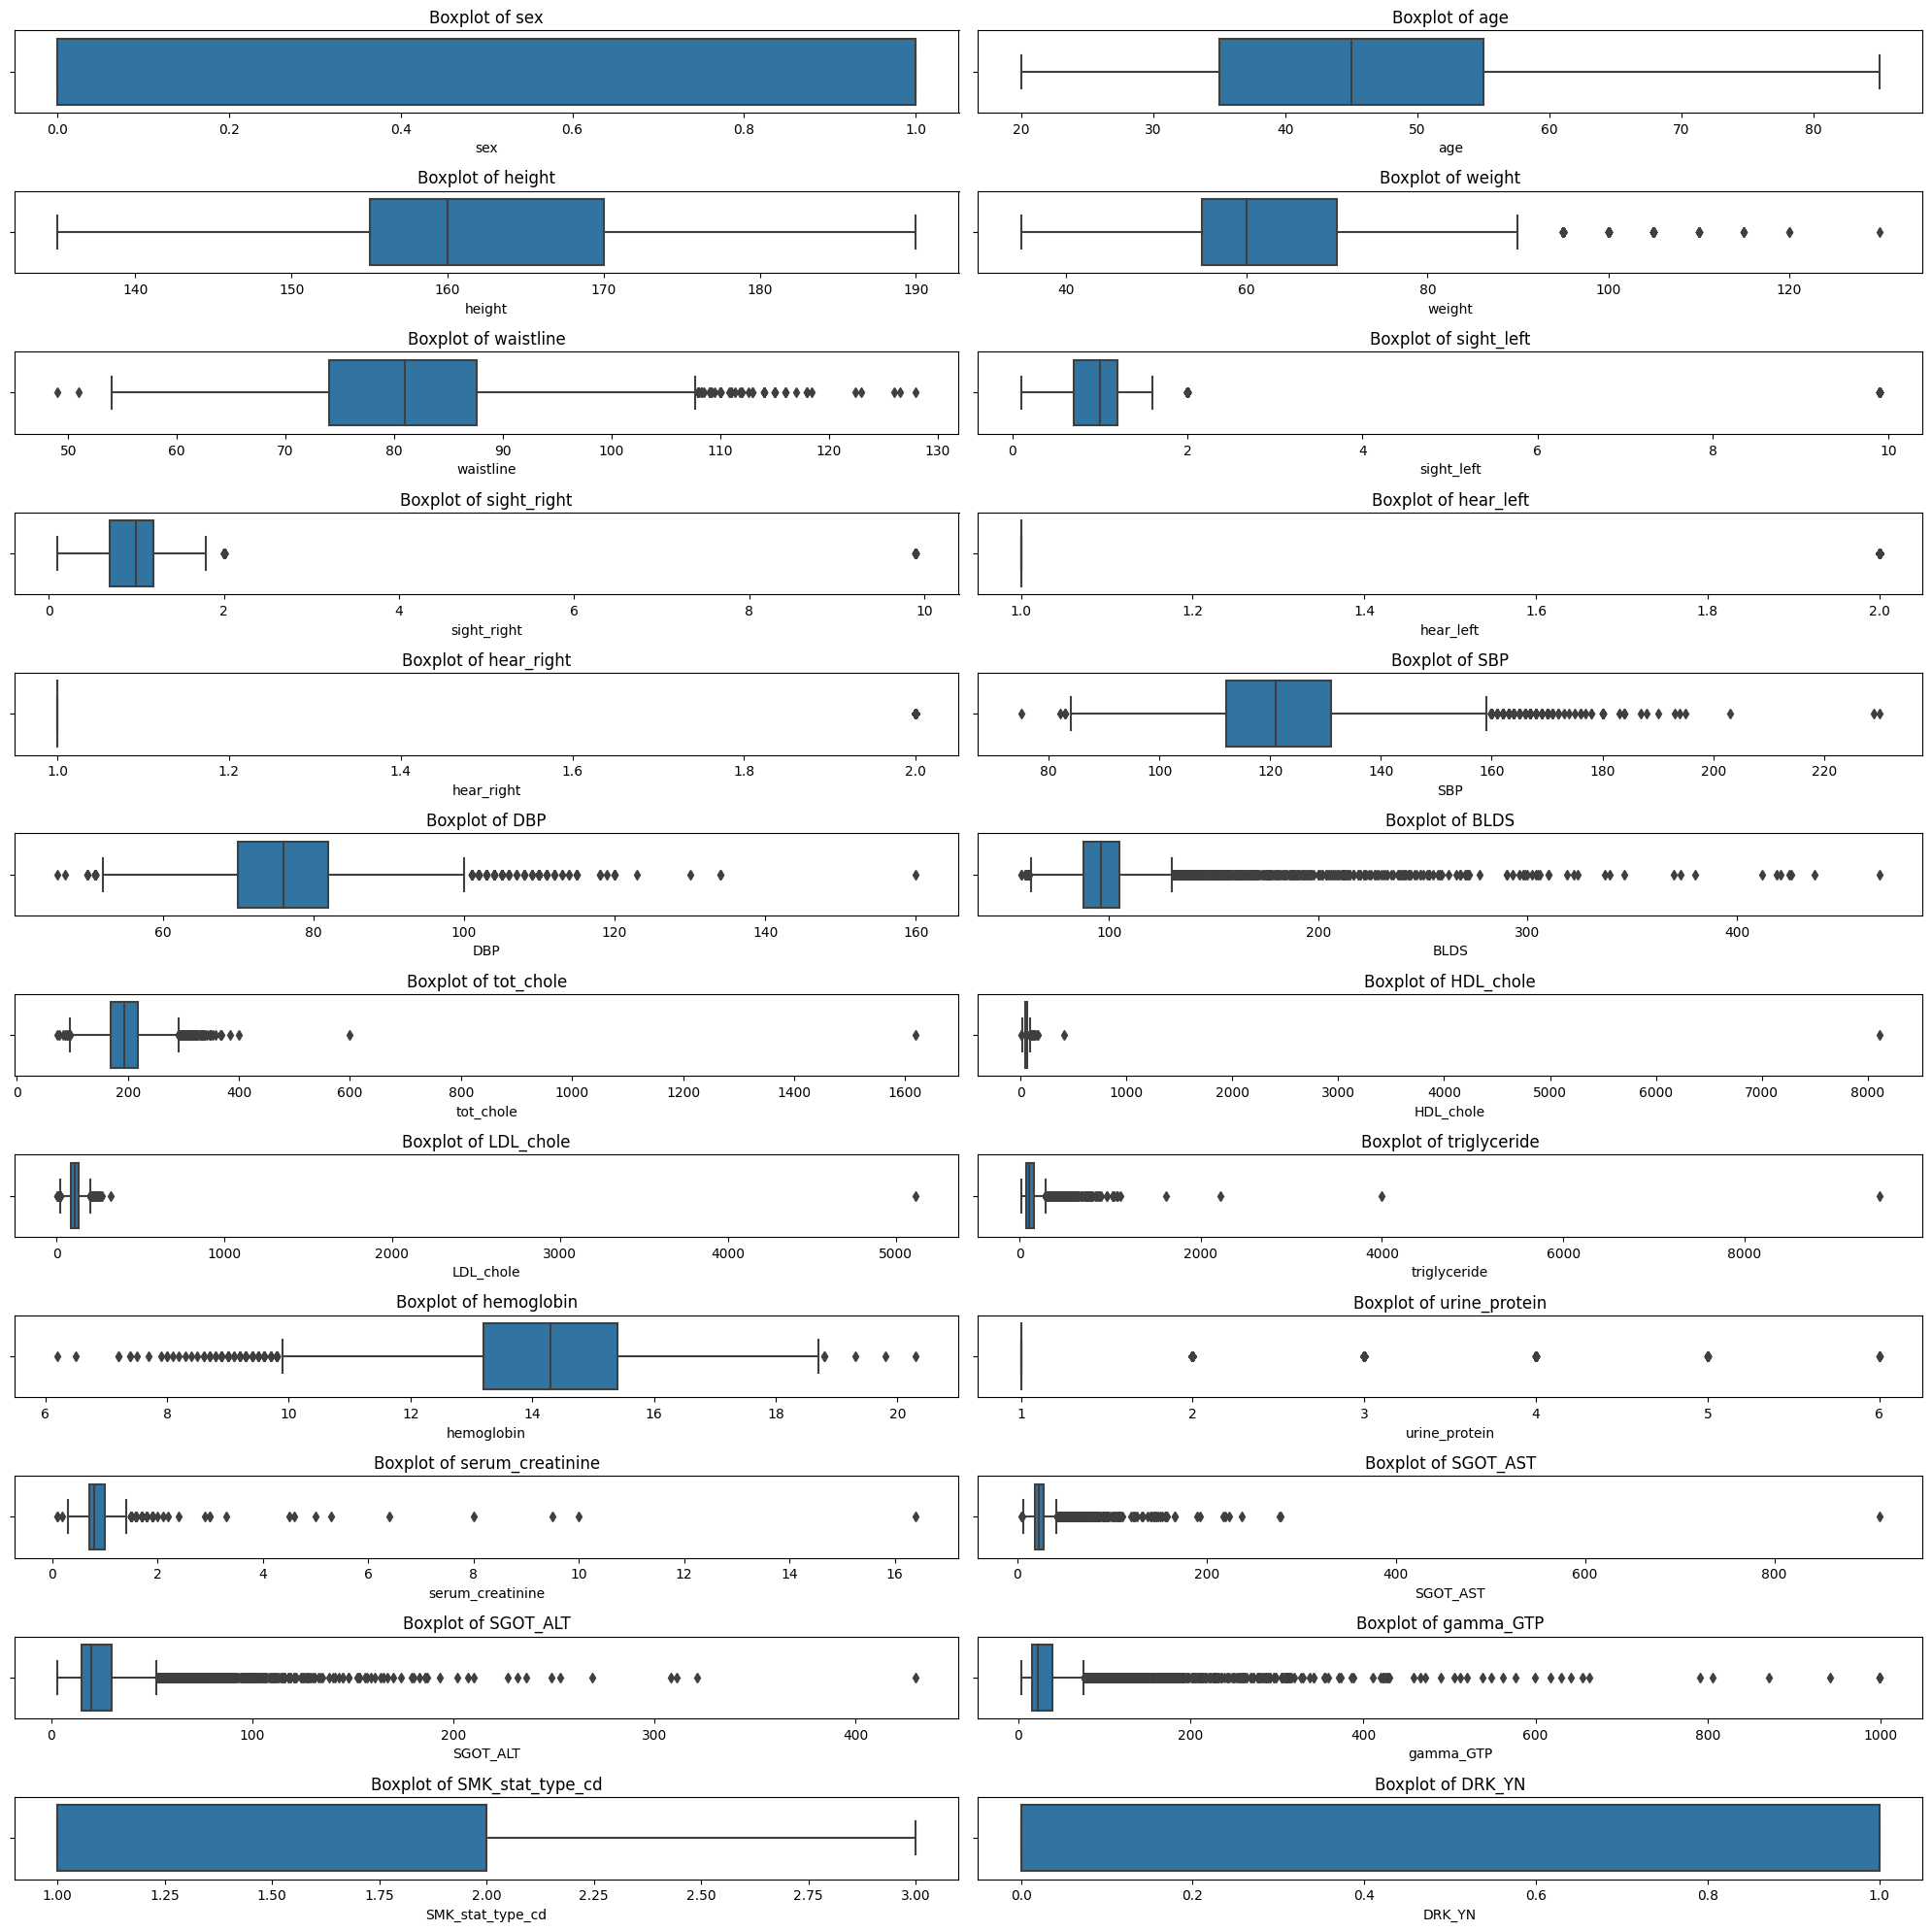

In [9]:
plot_boxplots(df)

In [10]:
def remove_outliers(df, columns, k=1.5):
    """
A function to remove outliers from the specified dataframe columns.

    Parameters:
    df (pandas.DataFrame): the original dataframe
    columns (list): list of columns to remove outliers for
    k (float): coefficient for calculating range boundaries
    """
    for column in columns:
        # Calculate the first and third quartiles
        q1 = df[column].quantile(0.25) # We find the 25 smallest values
        q3 = df[column].quantile(0.75) # We find the 25 largest values

        # Calculate the interquartile range (the difference between the largest and smallest values)
        iqr = q3 - q1

        #Replace values outside the range [q1 * qr, q3 + k * ir] with boundary values
        #clip -used to crop values 
        #lower: minimum value for cropping. If the value of the element is less than lower, it is replaced by lower.
        #upper: maximum value for cropping. If the value of the element is greater than upper, it is replaced by upper.
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

In [11]:
remove_outliers(df,['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'] , k=1.5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,41.5,32.0,68.0,1.0,0
3,1,50,175,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,30,185,70.0,80.0,0.7,0.7,1.0,1.0,117.0,...,108.0,48.0,16.0,1.0,0.9,18.0,14.0,17.0,1.0,1
9996,1,40,175,90.0,106.0,1.2,1.0,1.0,1.0,138.0,...,97.0,146.0,16.4,1.0,0.9,39.0,52.5,76.0,3.0,1
9997,0,60,155,50.0,77.3,0.6,1.0,1.0,1.0,121.0,...,89.0,263.0,13.2,1.0,0.6,19.0,19.0,14.0,1.0,0
9998,0,45,165,65.0,77.1,0.9,0.9,1.0,1.0,118.0,...,138.0,221.0,12.6,1.0,0.8,20.0,12.0,12.0,1.0,0


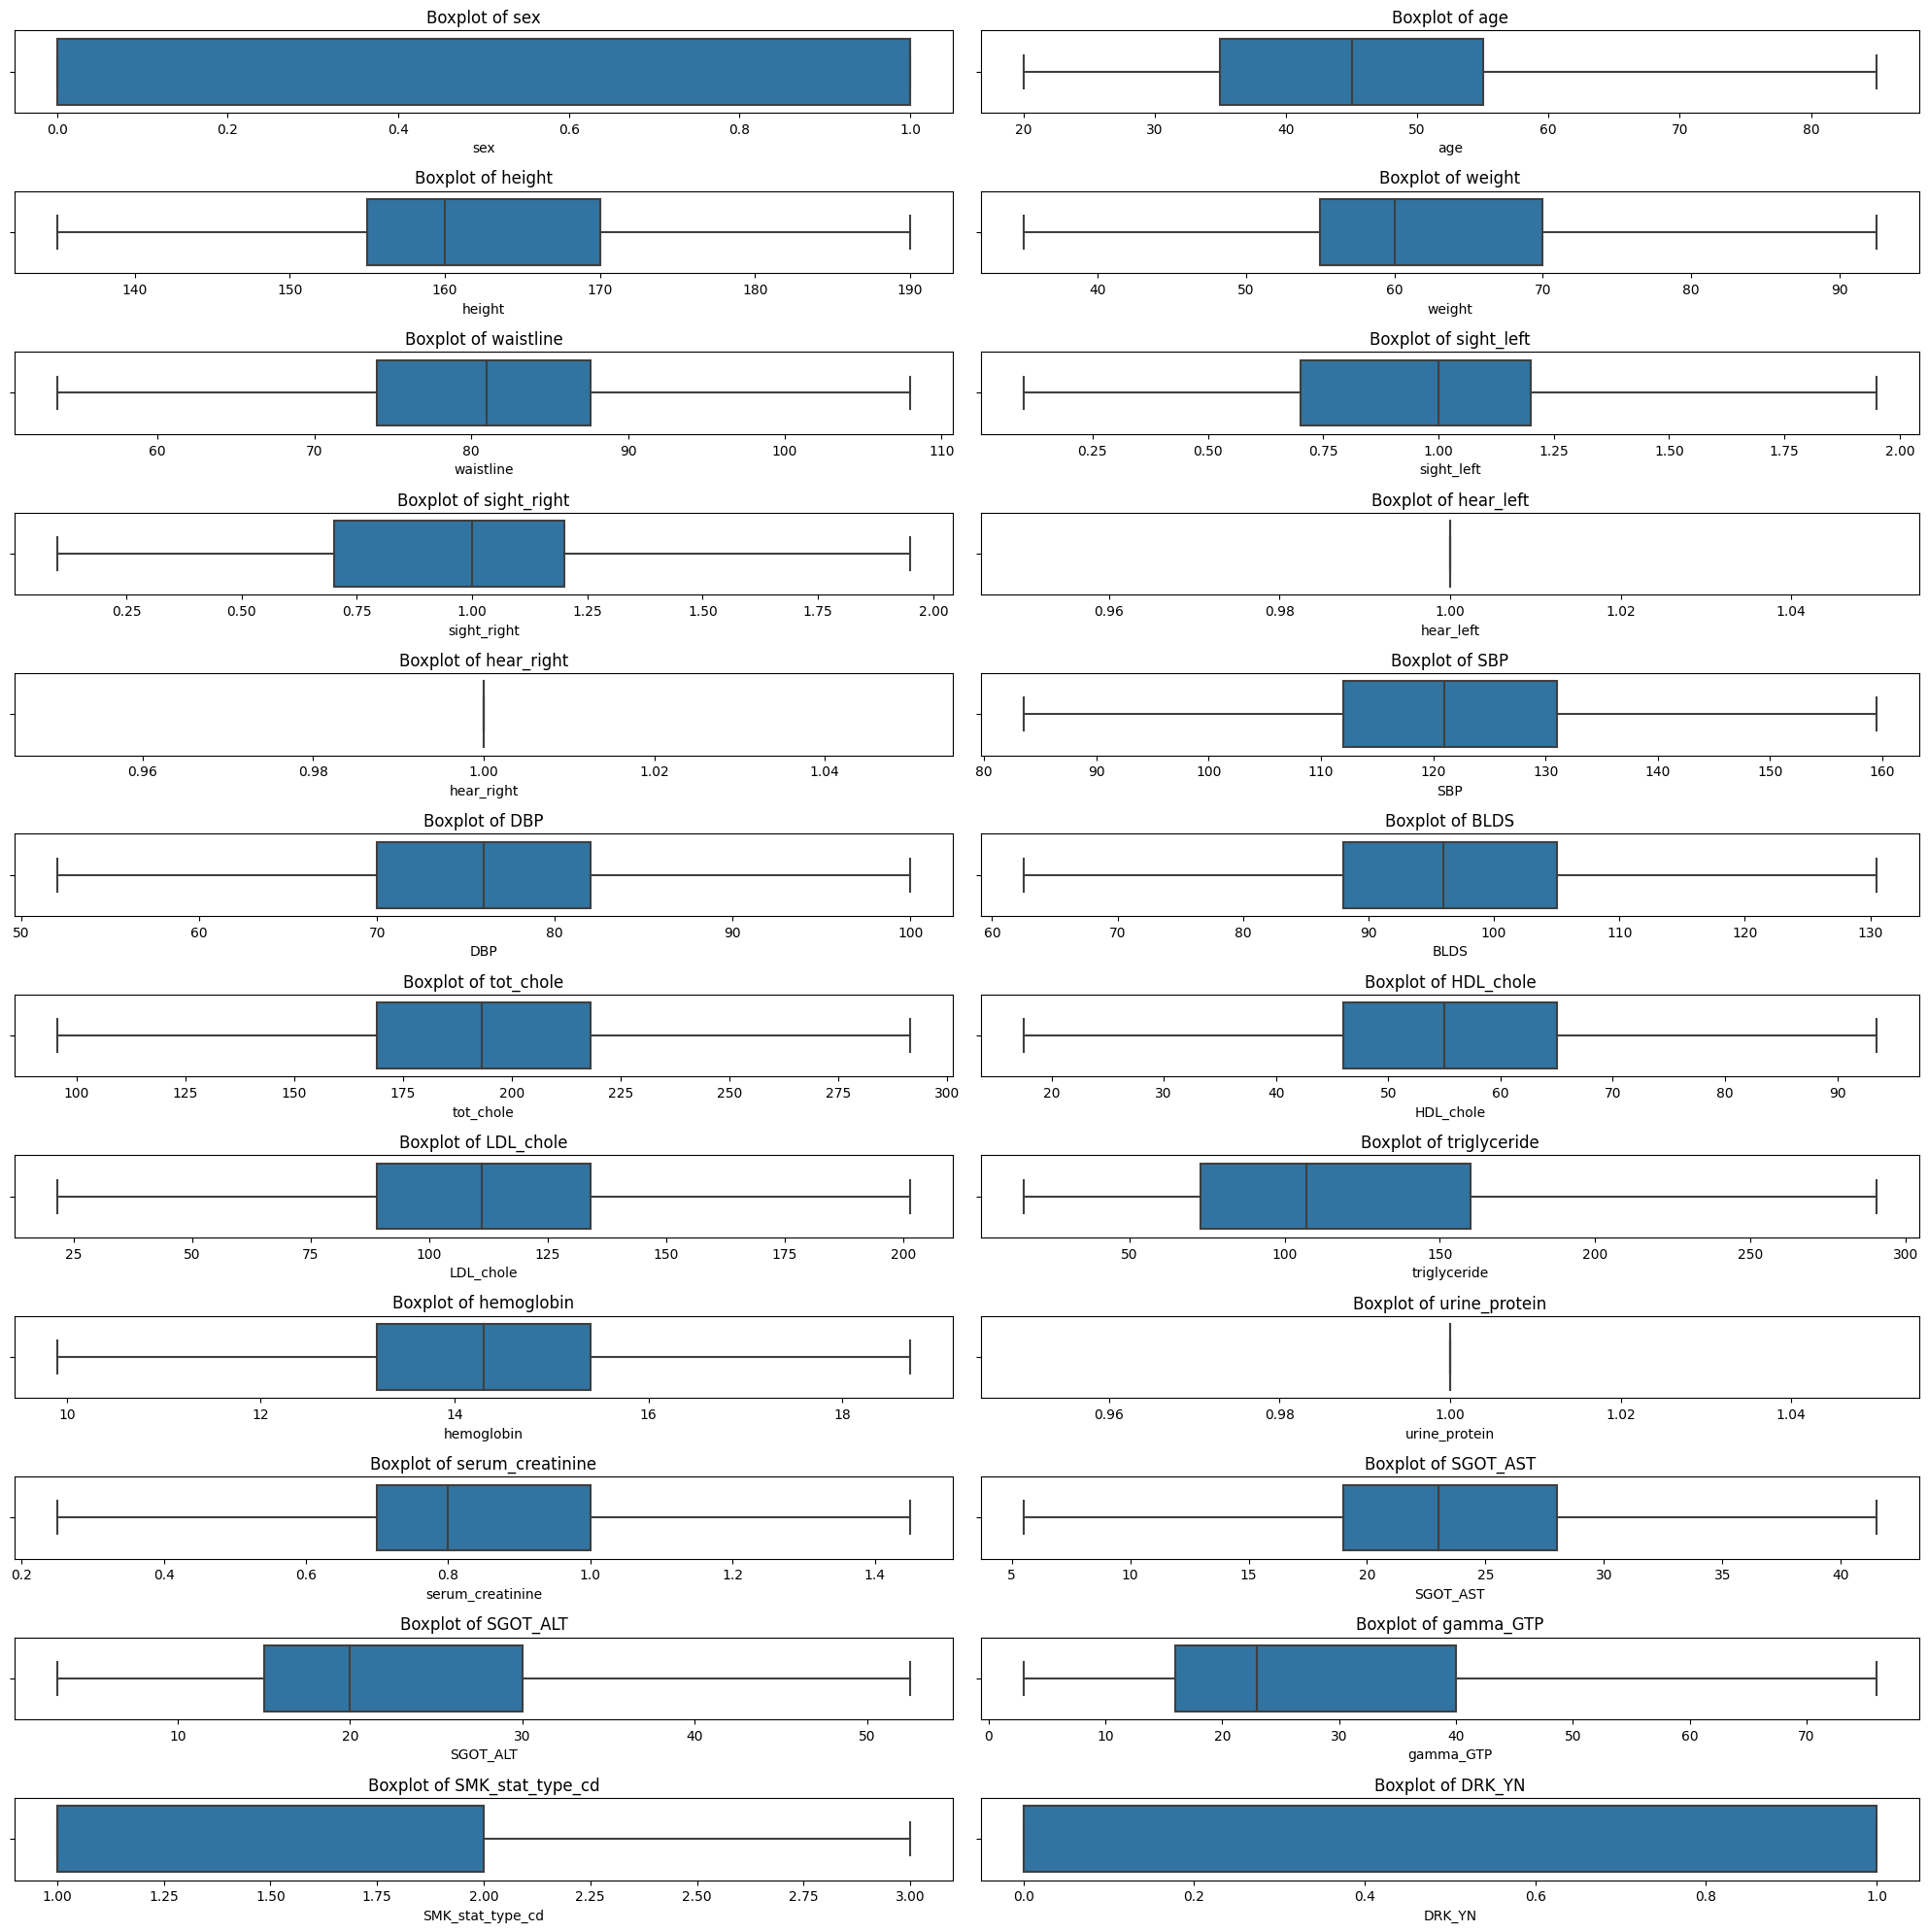

In [12]:
plot_boxplots(df)

# Drop value that are inf

In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values and fill or drop them
df.dropna(inplace=True)

# Some Visualization of the Data

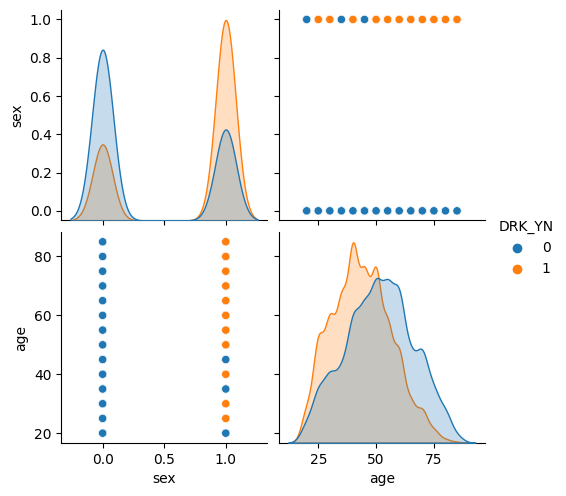

In [14]:
#features = ['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right' , 'DRK_YN']
#features = ['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
#       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
#       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
#       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
#       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']
features = ['sex', 'age' , 'DRK_YN']
# Create a pairplot for all combinations of features
sns.pairplot(df[features] , hue = 'DRK_YN')
#sns.pairplot(df[features], hue='target', plot_kws={'alpha':0.5})
plt.show()

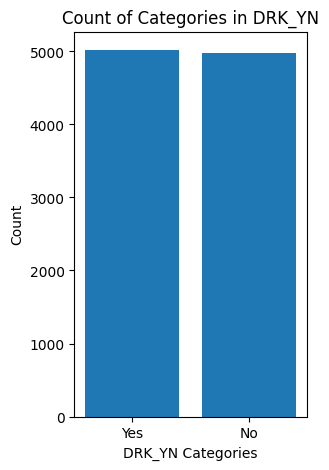

In [15]:
counts = df['DRK_YN'].value_counts()

# Create a bar chart
plt.figure(figsize=(3, 5))  # Optional: Adjust the figure size
plt.bar(counts.index, counts.values)
plt.xlabel("DRK_YN Categories")
plt.xticks(counts.index, ["Yes", "No"])  # Specify tick positions and labels
plt.ylabel("Count")
plt.title("Count of Categories in DRK_YN")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

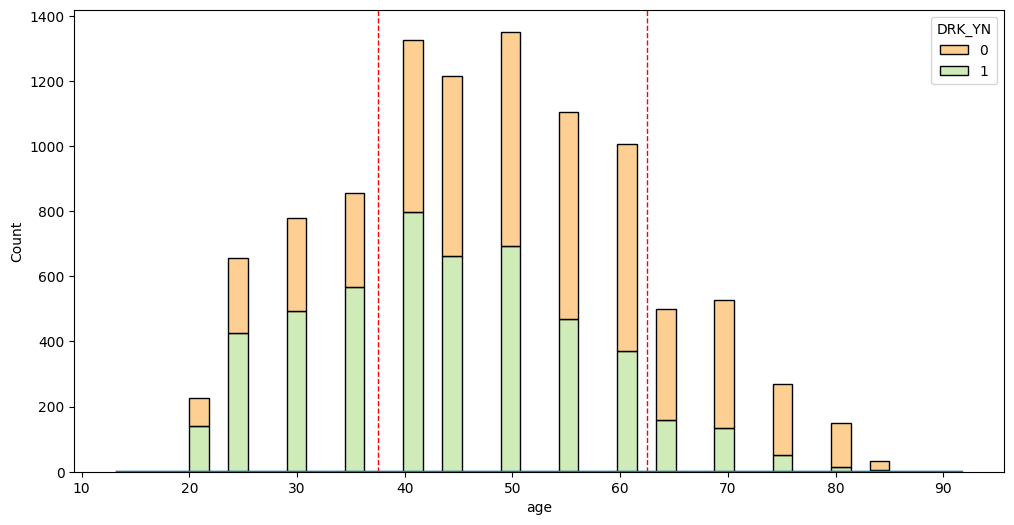

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='age',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.axvline(x= 37.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x= 62.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
sns.kdeplot(df.age)

<Axes: xlabel='height', ylabel='Count'>

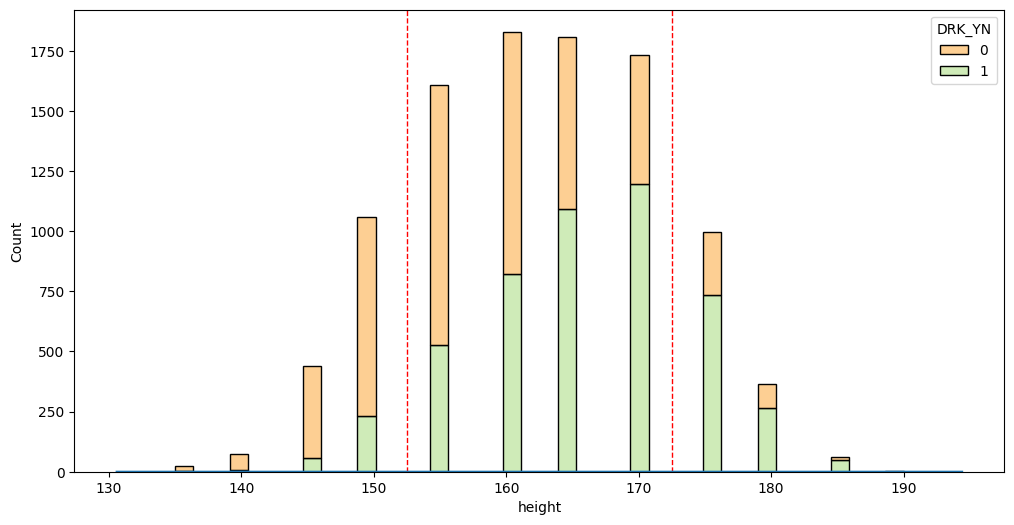

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='height',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.axvline(x= 152.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x= 172.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
sns.kdeplot(df.height)

<Axes: xlabel='weight', ylabel='Count'>

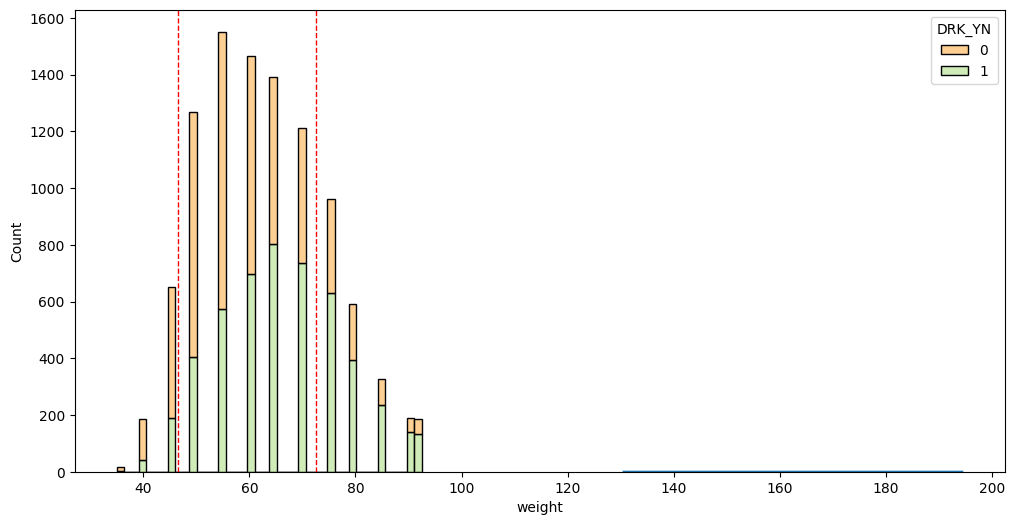

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='weight',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.axvline(x= 46.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x= 72.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
sns.kdeplot(df.height)

<Axes: xlabel='hemoglobin', ylabel='Count'>

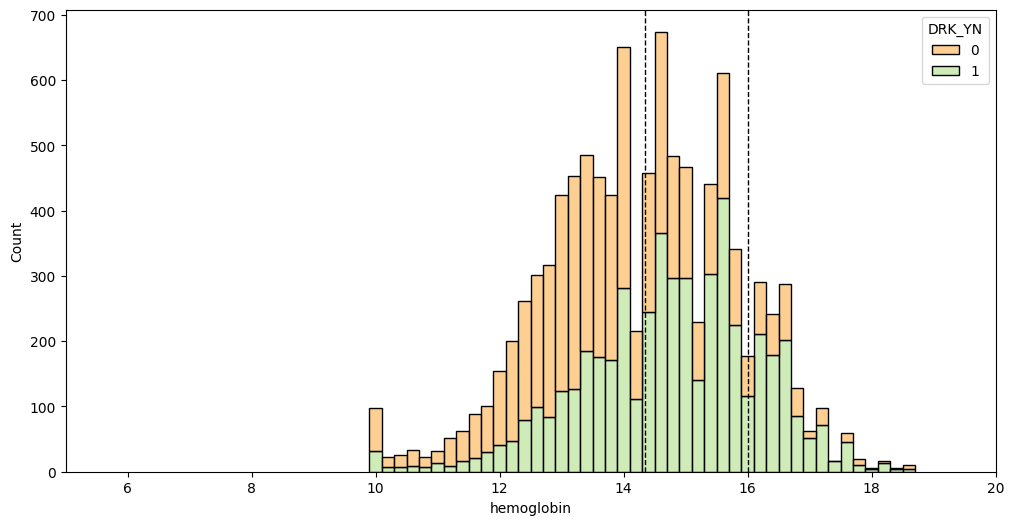

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='hemoglobin',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.axvline(x= 14.35, linewidth=1, color='k', linestyle='--', ymin=0, ymax=1)
plt.axvline(x= 16, linewidth=1, color='k', linestyle='--', ymin=0, ymax=1)
plt.xlim(5,20)
sns.kdeplot(df.height)

# Correlation

In [20]:
corr_matrix = df.corr()
correlation_with_result = corr_matrix['DRK_YN'].sort_values(ascending=False)
correlation_df = pd.DataFrame(correlation_with_result, columns=['DRK_YN'])
correlation_df

,DRK_YN
DRK_YN,1.000000
sex,0.378448
height,0.378359
SMK_stat_type_cd,0.344707
hemoglobin,0.311425
gamma_GTP,0.306110
weight,0.279684
serum_creatinine,0.175977
sight_right,0.153180
sight_left,0.147364


# Test PCA

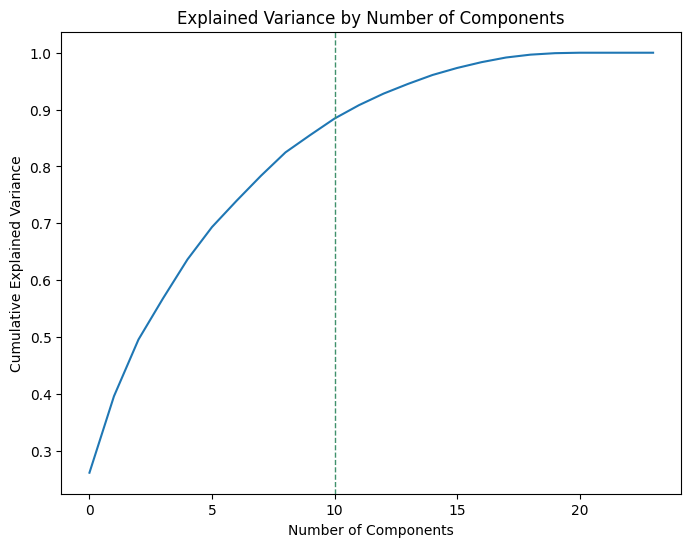

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['DRK_YN', 'sex'], axis=1)), columns=df.drop(['DRK_YN', 'sex'], axis=1).columns)

# Separate binary features from continuous features
binary_features = df[['DRK_YN', 'sex']]
continuous_features = data_scaled

# Combine the binary features with the scaled continuous features
data_processed = pd.concat([binary_features, continuous_features], axis=1)

pca = PCA().fit(data_processed)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=10, color="#40916c", label='axvline-fullheight', ls='--', linewidth=1)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

****we choose nb of components = 10 , where is the elbow pt****

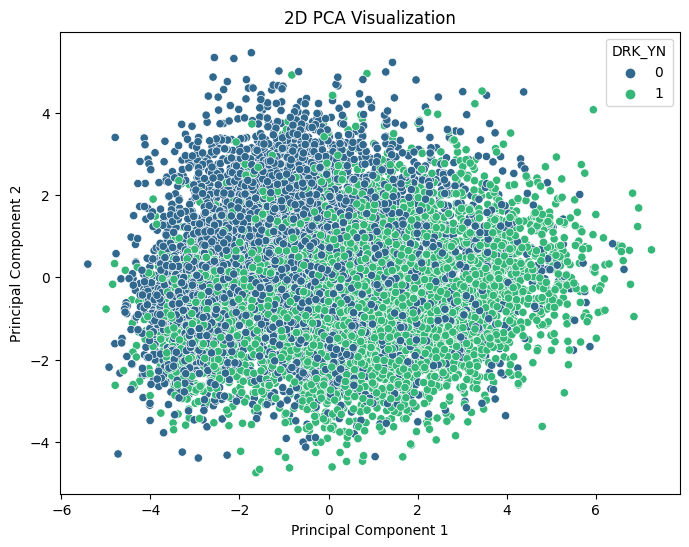

In [22]:
optimal_components = 10
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(data_processed)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(optimal_components)])
final_df = pd.concat([principal_df, binary_features], axis=1)

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DRK_YN', data=final_df, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.show()

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(principal_components, df['DRK_YN'], test_size=0.25, random_state=42)

****test random forest****

In [24]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1224
           1       0.76      0.74      0.75      1276

    accuracy                           0.74      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.74      0.74      0.74      2500



# T-SNE

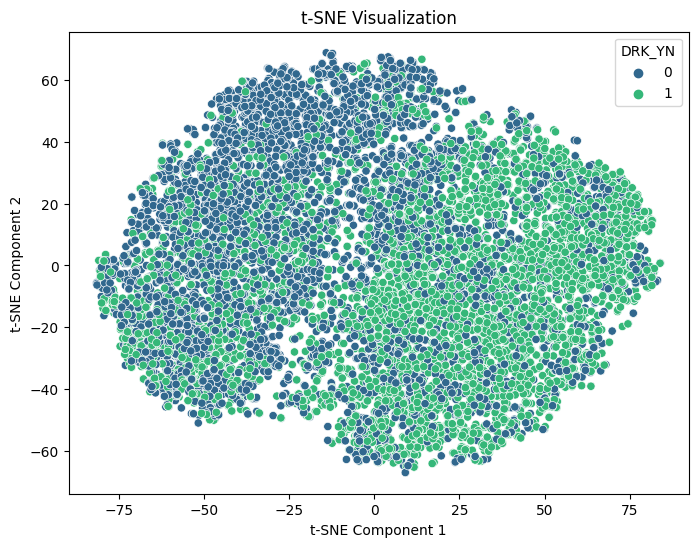

In [25]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(principal_components)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_final_df = pd.concat([tsne_df, binary_features], axis=1)

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DRK_YN', data=tsne_final_df, palette='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

# View Importance

Feature importances:
PC1: 0.1843819216979773
PC2: 0.13866361118189005
PC3: 0.1232230172120914
PC4: 0.09493675307456324
PC5: 0.0904705489027547
PC6: 0.08503554319829135
PC7: 0.07210023980429989
PC8: 0.07060758925445644
PC9: 0.07058764757836919
PC10: 0.06999312809530639


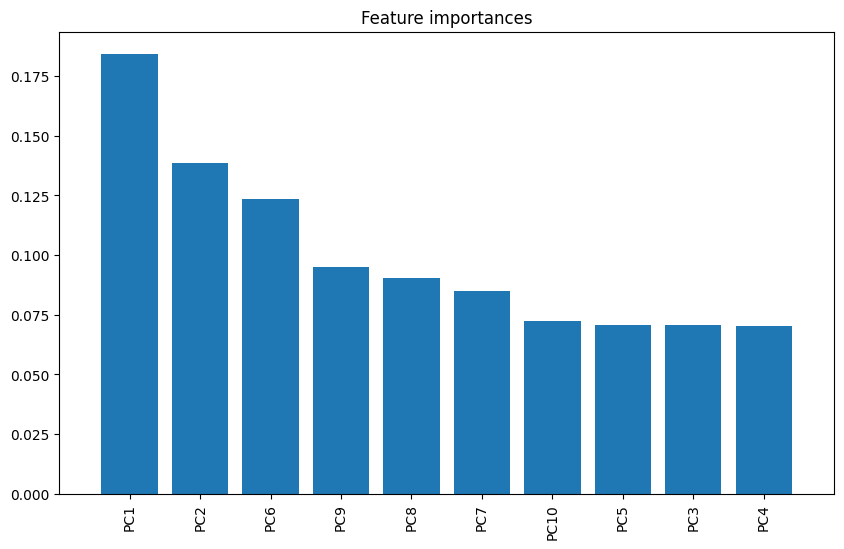

Number of features before reduction: 10
Number of features after reduction: 10
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1224
           1       0.75      0.74      0.74      1276

    accuracy                           0.74      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.74      0.74      0.74      2500



In [26]:
# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Print feature importances
print("Feature importances:")
for i in range(X_train.shape[1]):
    print(f"PC{i+1}: {importances[indices[i]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [f'PC{indices[i]+1}' for i in range(X_train.shape[1])], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Define a threshold for feature importance
threshold = 0.05
important_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

X_train_reduced = X_train[:, important_indices]
X_test_reduced = X_test[:, important_indices]

print(f"Number of features before reduction: {X_train.shape[1]}")
print(f"Number of features after reduction: {X_train_reduced.shape[1]}")

# Retrain the RandomForestClassifier on the reduced feature set
model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(X_train_reduced, Y_train)

# Predict and evaluate the model
y_pred_reduced = model_reduced.predict(X_test_reduced)
print(classification_report(Y_test, y_pred_reduced))

****no features has extracted****

In [27]:
X_train = X_train_reduced
X_test = X_test_reduced

# ****Models****

# KNN 

Best parameters found:  {'n_neighbors': 20, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1224
           1       0.75      0.71      0.73      1276

    accuracy                           0.73      2500
   macro avg       0.74      0.73      0.73      2500
weighted avg       0.74      0.73      0.73      2500

Test Accuracy: 0.7344
Training accuracy: 0.75


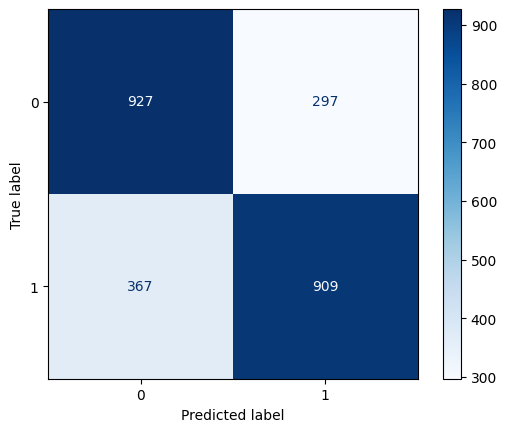

In [75]:
param_grid = {
    'n_neighbors': [5, 10, 20],  # Adjust the range of neighbors
    'weights': ['uniform', 'distance']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train KNN with best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, Y_train)

# Predict and evaluate KNN on test set
y_pred_knn = best_knn.predict(X_test)
print(classification_report(Y_test, y_pred_knn))

# Calculate and print test accuracy
test_accuracy_knn = accuracy_score(Y_test, y_pred_knn)
print("Test Accuracy:", test_accuracy_knn)

# Calculate and print training accuracy
train_accuracy_knn = accuracy_score(Y_train, best_knn.predict(X_train))
print(f'Training accuracy: {train_accuracy_knn:.2f}')

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Logistic Regression

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.744
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1224
           1       0.77      0.72      0.74      1276

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500

Test Accuracy: 0.7468
Training accuracy: 0.74


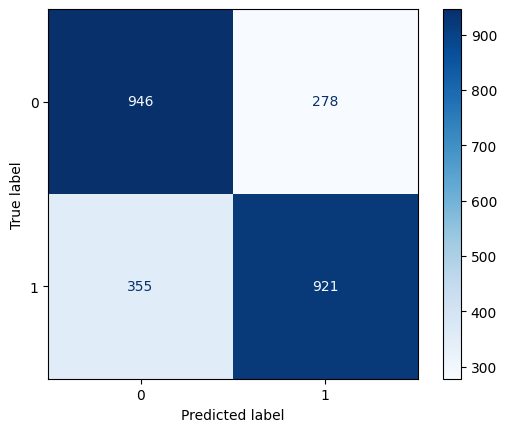

In [29]:
# Define Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
train_acc_log = grid_search.best_score_

# Evaluate model on test set
best_log = grid_search.best_estimator_
best_log.fit(X_train, Y_train)

# Predict and evaluate KNN
y_pred_log = best_log.predict(X_test)
print(classification_report(Y_test, y_pred_log))


#Accuracy
test_accuracy_log = accuracy_score(Y_test, y_pred_log)
print("Test Accuracy:", test_accuracy_log)
# Calculate training accuracy
train_accuracy_log = accuracy_score(Y_train, best_log.predict(X_train))
print(f'Training accuracy: {train_accuracy_log:.2f}')

#confusion matrix
cm = confusion_matrix(Y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.75
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1224
           1       0.75      0.77      0.76      1276

    accuracy                           0.76      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.76      0.76      0.76      2500

Test Accuracy: 0.7556
Training accuracy: 0.77


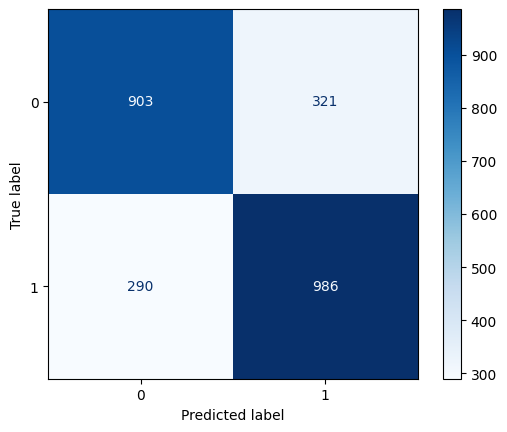

In [30]:
svm_model = SVC(kernel='rbf')

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, Y_train)

# Best parameters and best score found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predictions using best estimator
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

#Accuracy
test_accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print("Test Accuracy:", test_accuracy_svm)
# Calculate training accuracy
train_accuracy_svm = accuracy_score(Y_train, best_svm.predict(X_train))
print(f'Training accuracy: {train_accuracy_svm:.2f}')

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Random Forest

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation score: 0.74
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1224
           1       0.75      0.76      0.75      1276

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500

Test Accuracy: 0.7472
Training accuracy: 0.86


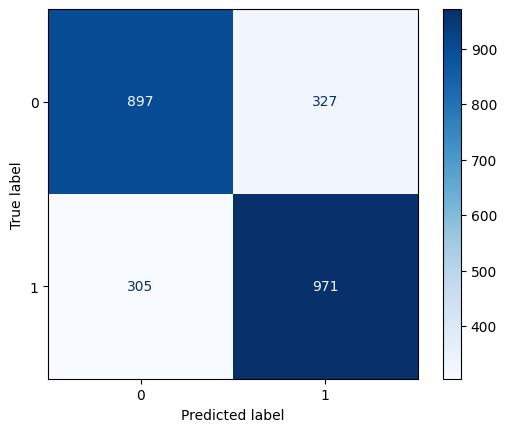

In [31]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Parameter grid (reduce the size compared to the previous example)
param_grid = {
    'n_estimators': [200, 300 , 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10 , 50],
    'min_samples_leaf': [5, 10 , 50],
    'max_features': ['auto', 'sqrt'],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search.fit(X_train, Y_train)

# Best parameters and best score found by RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Predictions using best estimator
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Classification report and accuracy
print(classification_report(Y_test, y_pred_rf))

#Accuracy
test_accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print("Test Accuracy:", test_accuracy_rf)
# Calculate training accuracy
train_accuracy_rf = accuracy_score(Y_train, best_rf.predict(X_train))
print(f'Training accuracy: {train_accuracy_rf:.2f}')


# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Decision Tree

Test accuracy: 0.66
Training accuracy: 1.00
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1224
           1       0.67      0.68      0.67      1276

    accuracy                           0.66      2500
   macro avg       0.66      0.66      0.66      2500
weighted avg       0.66      0.66      0.66      2500



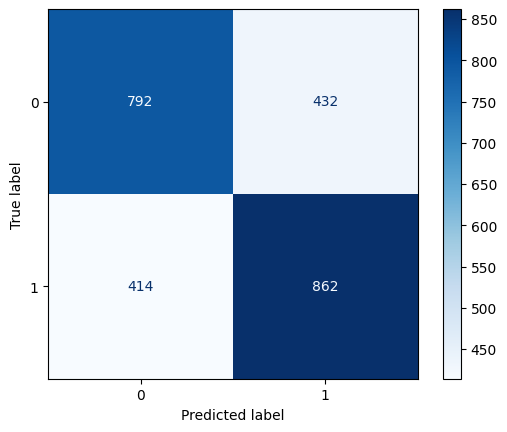

In [32]:
# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0,criterion="entropy")
clf.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_dt = clf.predict(X_test)

# Evaluate the model
test_accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print(f'Test accuracy: {test_accuracy_dt:.2f}')
# Make predictions on the training data
y_train_pred = clf.predict(X_train)

# Calculate training accuracy
train_accuracy_dt = accuracy_score(Y_train, y_train_pred)
print(f'Training accuracy: {train_accuracy_dt:.2f}')

print(classification_report(Y_test, y_pred_dt))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

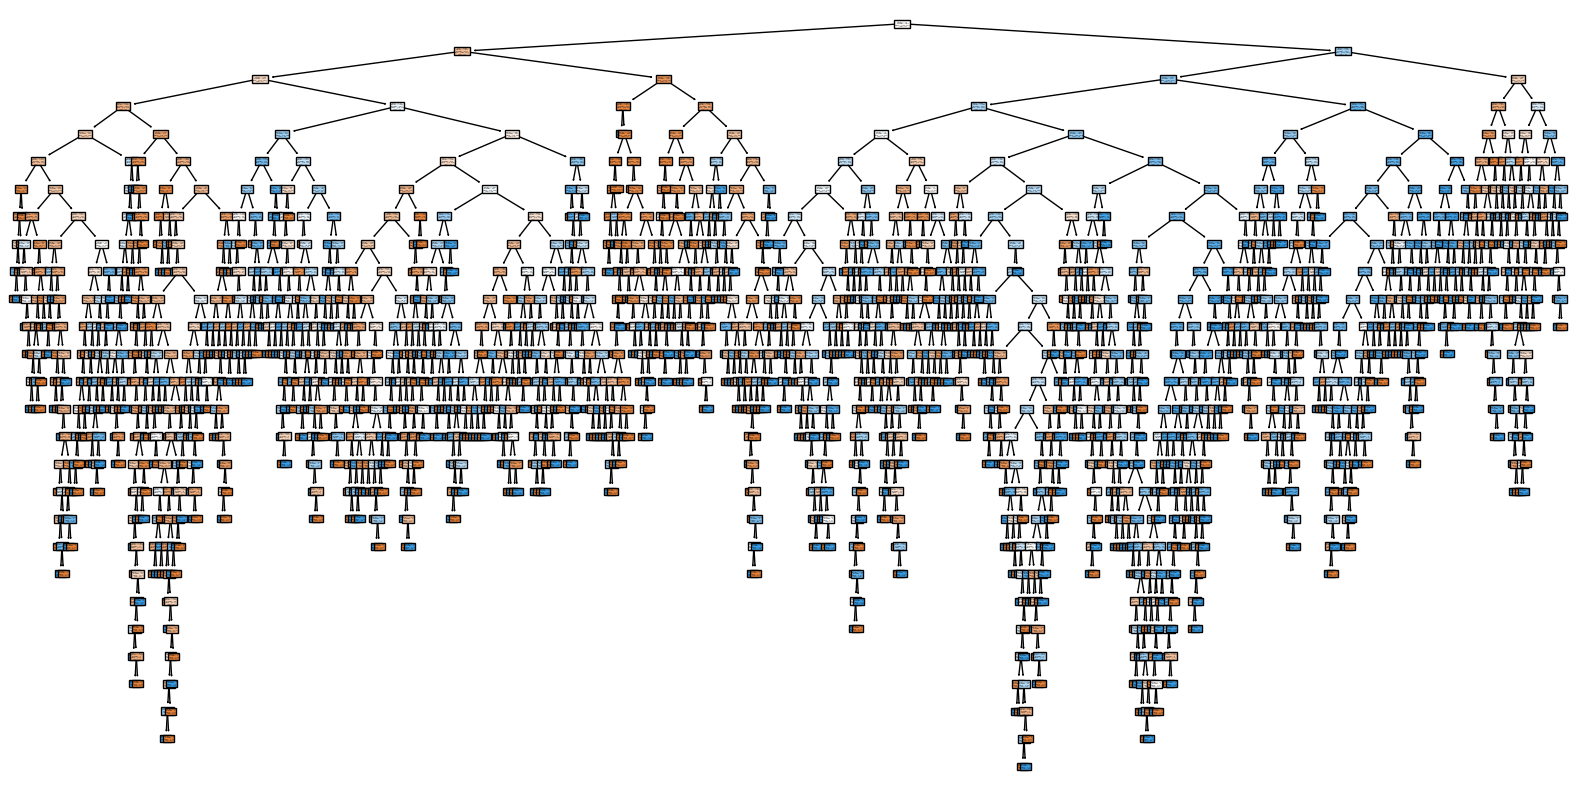

In [33]:
# Assuming feature names are PC1, PC2, ..., PC10 and the names of binary features
principal_feature_names = [f'PC{i+1}' for i in range(optimal_components)]
binary_feature_names = binary_features.columns.tolist()  # Replace with actual binary feature names

# Combine feature names
feature_names = principal_feature_names + binary_feature_names
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['No', 'Yes'])
plt.show()

#  DT Pre-Pruning

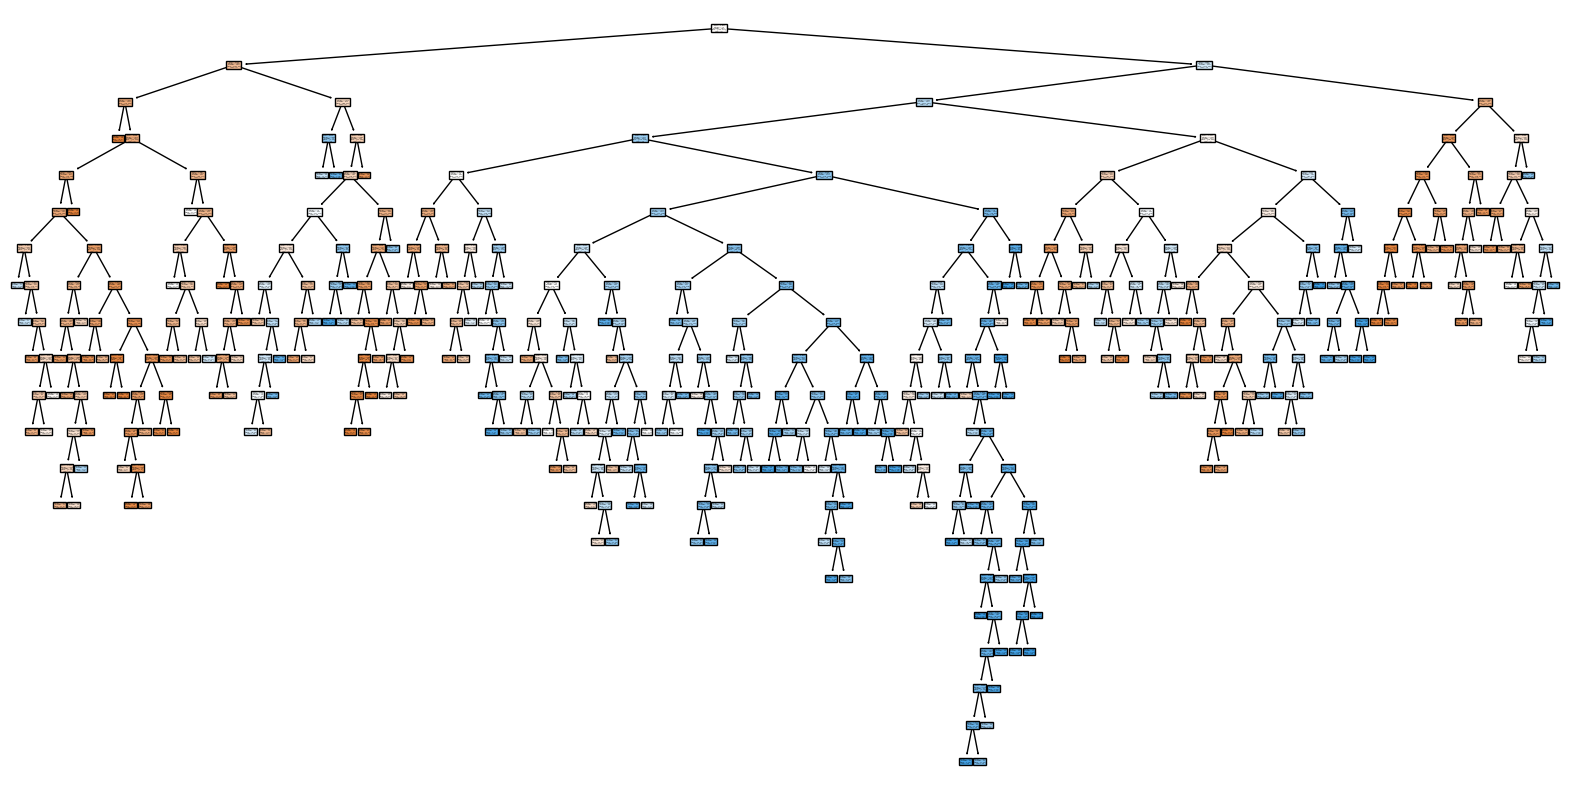

Test accuracy: 0.70
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1224
           1       0.71      0.70      0.71      1276

    accuracy                           0.70      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.70      0.70      0.70      2500

Test Accuracy: 0.7016
Training accuracy: 0.74


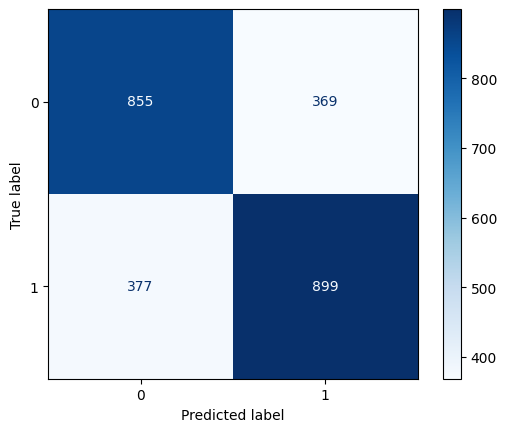

{'splitter': 'random', 'min_samples_split': 65, 'min_samples_leaf': 10, 'max_depth': 370, 'criterion': 'entropy'}


In [34]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": range(50, 1000, 10),
    "min_samples_leaf": range(5, 100, 5),
    "min_samples_split": range(5, 100, 5)
}

# Instantiate DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

# Use RandomizedSearchCV for hyperparameter optimization
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=300, cv=5, n_jobs=-1, random_state=0)
random_search.fit(X_train, Y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_clf = random_search.best_estimator_

# Optionally, plot the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=['No', 'Yes'])
plt.show()

# Make predictions on the test data using the best estimator
y_pred_dtpre = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_dtpre)
print(f'Test accuracy: {accuracy:.2f}')
print(classification_report(Y_test, y_pred_dtpre))

#Accuracy
test_accuracy_dtpre = accuracy_score(Y_test, y_pred_dtpre)
print("Test Accuracy:", test_accuracy_dtpre)
# Calculate training accuracy
train_accuracy_dtpre = accuracy_score(Y_train, best_clf.predict(X_train))
print(f'Training accuracy: {train_accuracy_dtpre:.2f}')


# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred_dtpre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(best_params)

# DT - Post-Pruning

Best alpha: 0.0004834226037615866


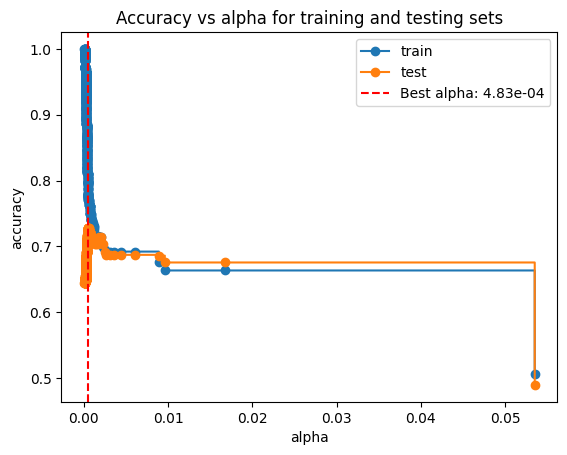

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1224
           1       0.72      0.77      0.74      1276

    accuracy                           0.73      2500
   macro avg       0.73      0.73      0.73      2500
weighted avg       0.73      0.73      0.73      2500

Test Accuracy: 0.7276
Training accuracy: 0.79


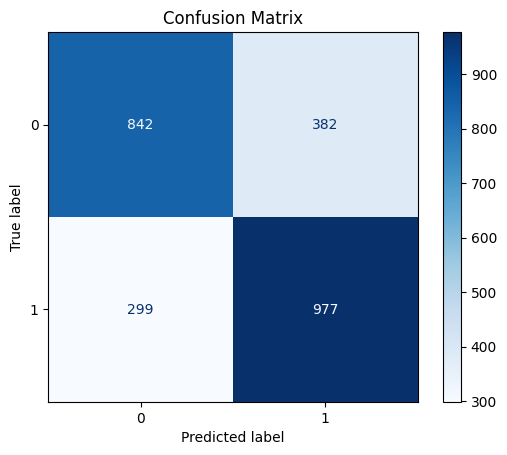

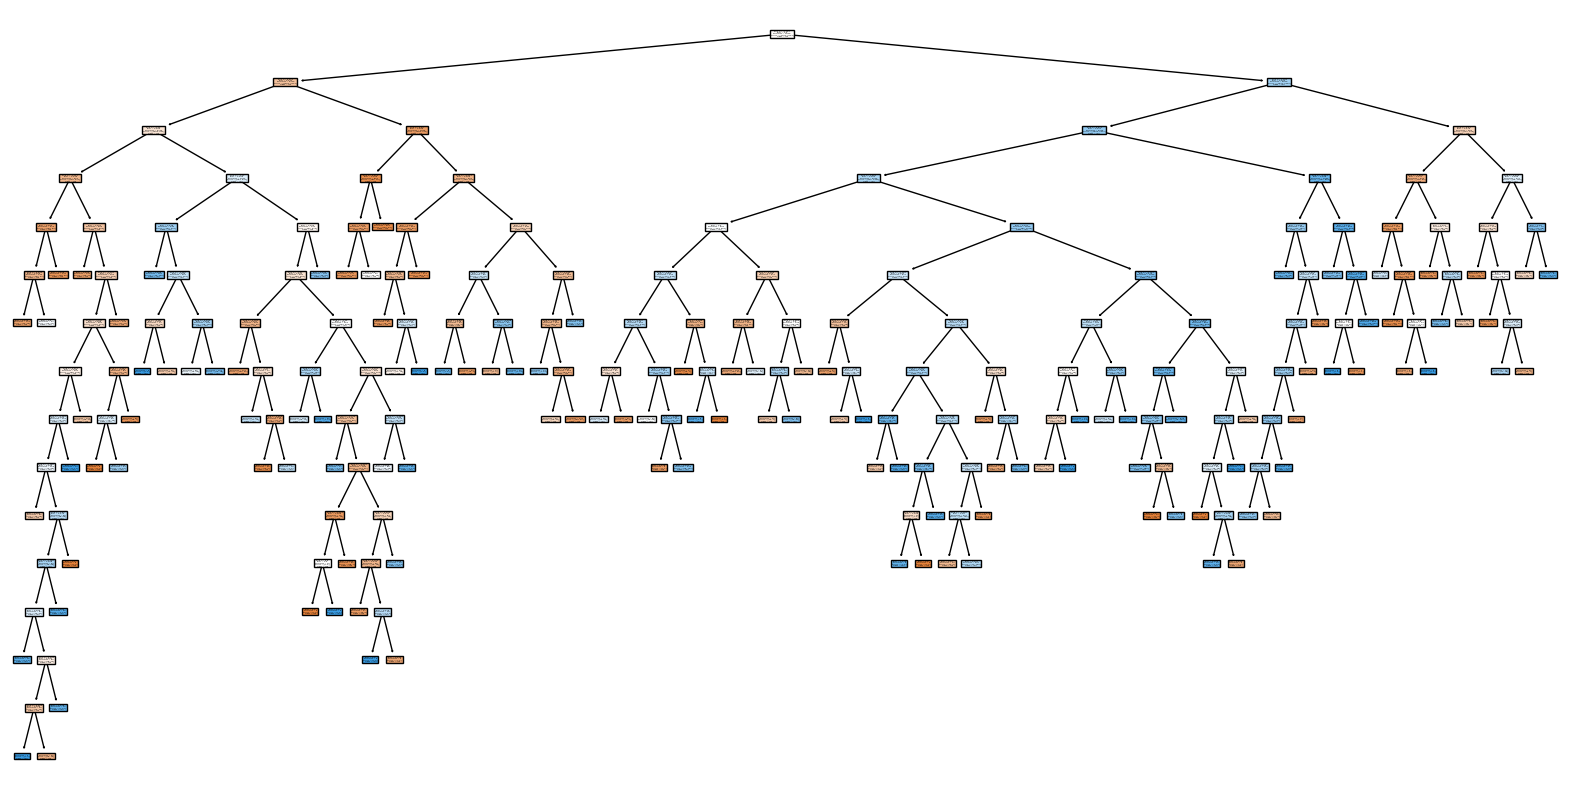

In [35]:
# Calculate the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Store the models for each ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

# Determine the best ccp_alpha based on test accuracy
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

best_alpha_index = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[best_alpha_index]
best_clf = clfs[best_alpha_index]

print(f"Best alpha: {best_alpha}")

# Plot accuracy vs alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best alpha: {best_alpha:.2e}')
ax.legend()
plt.show()

# Evaluate the model with the best alpha
y_pred_dtpost = best_clf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred_dtpost))

#Accuracy
test_accuracy_dtpost = accuracy_score(Y_test, y_pred_dtpost)
print("Test Accuracy:", test_accuracy_dtpost)
# Calculate training accuracy
train_accuracy_dtpost = accuracy_score(Y_train, best_clf.predict(X_train))
print(f'Training accuracy: {train_accuracy_dtpost:.2f}')


# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred_dtpost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#plot the tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=['No', 'Yes'])
plt.show()

# ****XGBoost****

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 100.0, 'reg_alpha': 1.0, 'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}
Best cross-validation score: 0.74
Test Accuracy: 0.7448
Training accuracy: 0.77
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1224
           1       0.75      0.74      0.75      1276

    accuracy                           0.74      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.74      0.74      0.74      2500



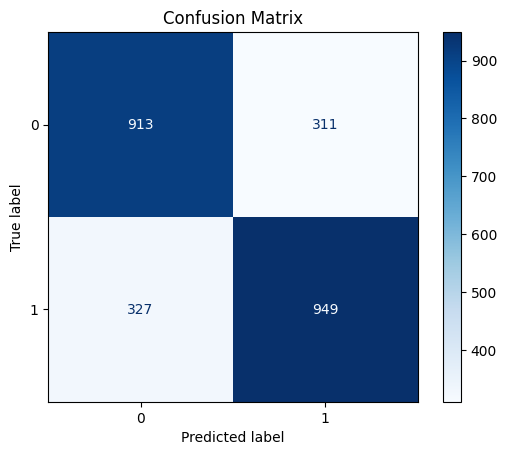

In [36]:
# Assuming X_train, X_test, Y_train, Y_test are already defined

clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': range(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0, 100.0]
}

# Use RandomizedSearchCV for hyperparameter optimization
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, Y_train)

# Get the best parameters and best estimator
best_clf = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test data using the best estimator
y_pred_xg = best_clf.predict(X_test)

# Print best parameters and evaluate model performance
print("Best parameters found: ", best_params)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


#Accuracy
test_accuracy_xg = accuracy_score(Y_test, y_pred_xg)
print("Test Accuracy:", test_accuracy_xg)
# Calculate training accuracy
train_accuracy_xg = accuracy_score(Y_train, best_clf.predict(X_train))
print(f'Training accuracy: {train_accuracy_xg:.2f}')

# Classification Report
print(classification_report(Y_test, y_pred_xg))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_xg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))  # Corrected from np.unique(y)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Neural Network

Trial 44 Complete [00h 00m 31s]
val_accuracy: 0.753333330154419

Best val_accuracy So Far: 0.7646666765213013
Total elapsed time: 00h 09m 15s
Best Hyperparameters:
{'activation': 'relu', 'layer_1': 83, 'layer_2': 98, 'layer_3': 16, 'layer_4': 44, 'learning_rate': 0.001, 'tuner/epochs': 13, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0008'}

Results Summary:
Results summary
Results in dir/x
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0023 summary
Hyperparameters:
activation: relu
layer_1: 83
layer_2: 98
layer_3: 16
layer_4: 44
learning_rate: 0.001
tuner/epochs: 13
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.7646666765213013

Trial 0040 summary
Hyperparameters:
activation: tanh
layer_1: 54
layer_2: 100
layer_3: 9
layer_4: 63
learning_rate: 0.001
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7633333206176758

Trial 0024 summary
Hyperparameter

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 83)             │           913 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 98)             │         8,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 44)             │           748 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,522 (45.01 KB)

 Trainable params: 11,522 (45.01 KB)

 Non-trainable params: 0 (0.00 B)

None


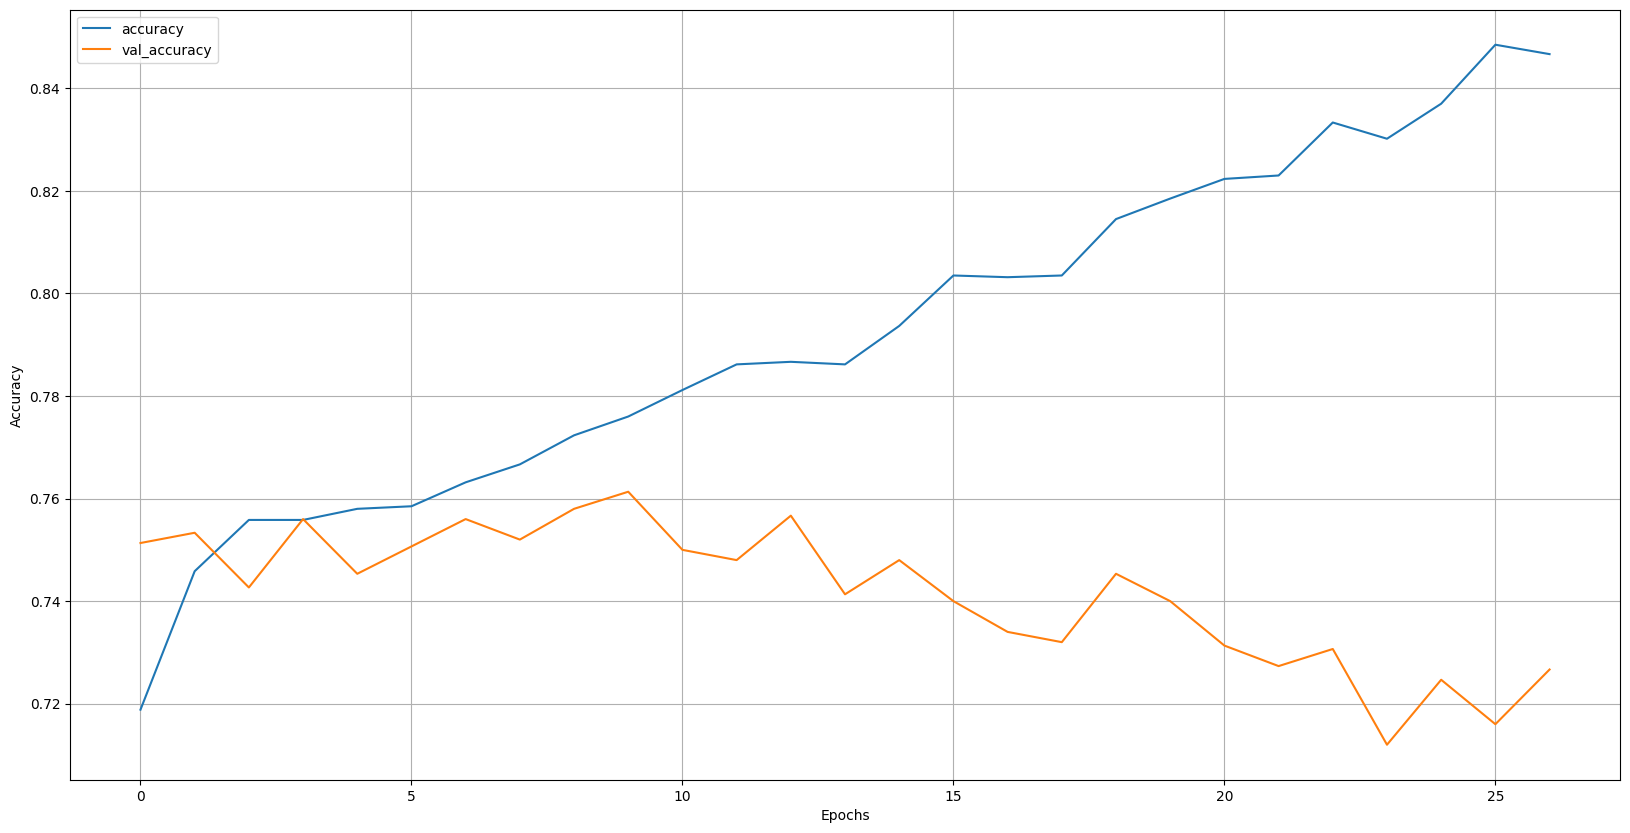

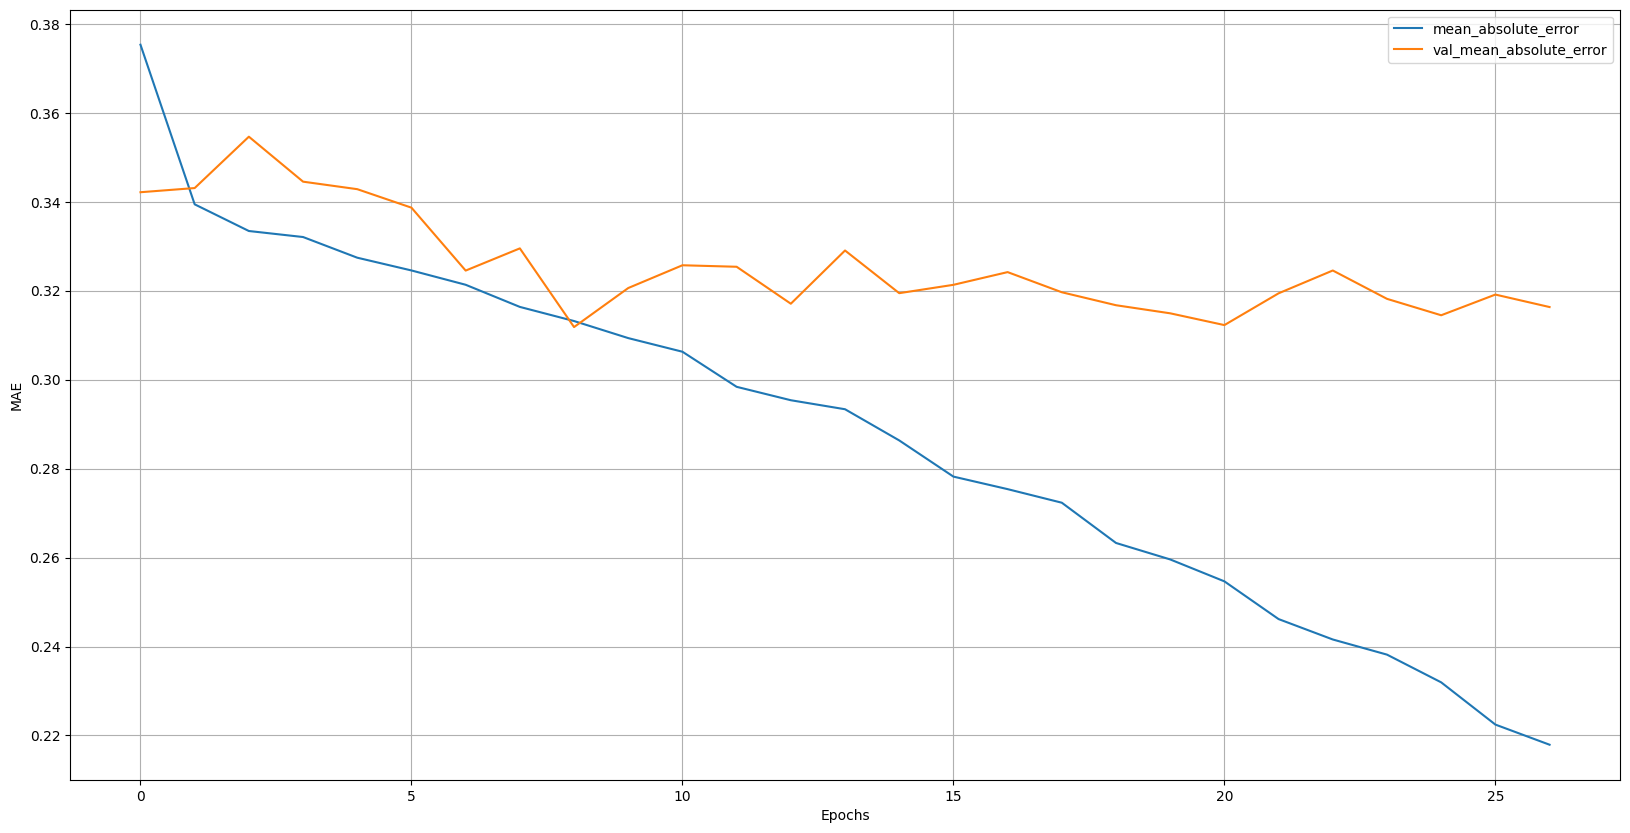

In [37]:
def model_builder2(hp):
    model = tf.keras.Sequential()
    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=128, step=1)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=128, step=1)
    hp_layer_3 = hp.Int('layer_3', min_value=1, max_value=128, step=1)
    hp_layer_4 = hp.Int('layer_4', min_value=1, max_value=64, step=1)
    #hp_layer_5 = hp.Int('layer_5', min_value=1 , max_value=32, step=1)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4 , 1e-2 , 1e-1])
    
    model.add(tf.keras.layers.Dense(units=hp_layer_1, input_dim=X_train.shape[1], activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_4, activation=hp_activation))
    #model.add(tf.keras.layers.Dense(units=hp_layer_5, activation=hp_activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy', 'mean_absolute_error'])
    
    return model

# Initialize the tuner
tuner = kt.Hyperband(model_builder2, 
                    objective='val_accuracy', 
                    max_epochs=50, 
                    factor=4, 
                    directory='dir', 
                    project_name='x')

# Define the early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Perform the hyperparameter search
tuner.search(X_train, Y_train, 
             epochs=50, 
             validation_split=0.2, 
             callbacks=[stop_early], 
             batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hps.values)

# Print the results summary
print("\nResults Summary:")
print(tuner.results_summary())

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(X_train, Y_train, 
                    epochs=50, 
                    validation_split=0.2, 
                    callbacks=[stop_early], 
                    batch_size=32)

# Plot the history
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(20, 10), ylabel='Accuracy', xlabel='Epochs', grid=True)
pd.DataFrame(history.history)[['mean_absolute_error', 'val_mean_absolute_error']].plot(figsize=(20,10), ylabel='MAE', xlabel='Epochs', grid=True)
print(tuner.get_best_hyperparameters()[0].values)
#print(tuner.results_summary())
print(tuner.get_best_models()[0].summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 83)             │           913 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 98)             │         8,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 44)             │           748 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,522 (45.01 KB)

 Trainable params: 11,522 (45.01 KB)

 Non-trainable params: 0 (0.00 B)

None
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1224
           1       0.74      0.79      0.76      1276

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500

Test Accuracy: 0.7528
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training accuracy: 0.77


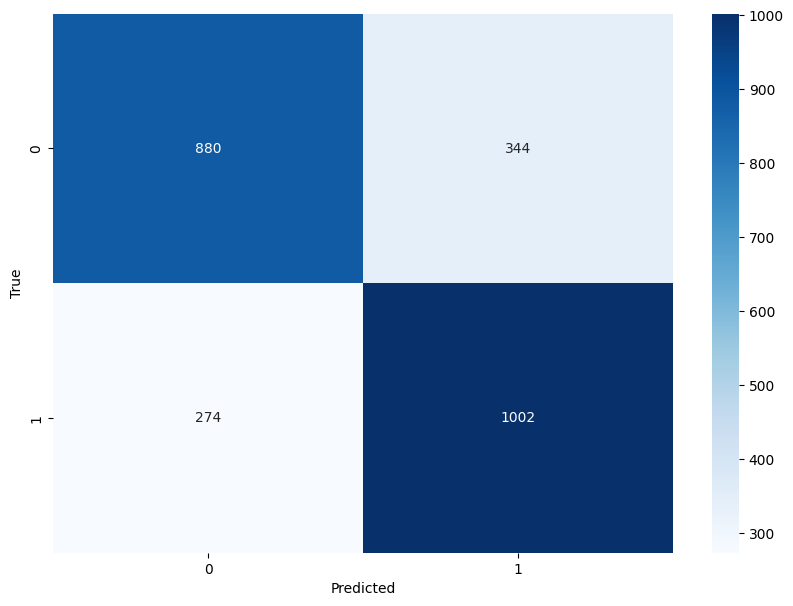

In [58]:
# Get the best models
best_model = tuner.get_best_models(num_models=1)[0]
# Print the summary of the best model
print(best_model.summary())

# Evaluate the best model on the test set
Y_pred_ann = (best_model.predict(X_test) > 0.5).astype("int32")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_ann))

#Accuracy
test_accuracy_ann = accuracy_score(Y_test, Y_pred_ann) 
print("Test Accuracy:", test_accuracy_ann)
# Calculate training accuracy
train_accuracy_ann = accuracy_score(Y_train, (best_model.predict(X_train) > 0.5).astype("int32"))
print(f'Training accuracy: {train_accuracy_ann:.2f}')

# Generate and plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_ann)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Comparison between Models

In [76]:
# Example of models and their predictions
models = ['KNN', 'Logistic','SVM', 'RandomForest' , 'Decision Tree' , 'DT Prepruning' , 'DT postpruning' , 'XGBoost' , 'ANN']
predictions = [y_pred_knn, y_pred_log,y_pred_svm, y_pred_rf ,y_pred_dt , y_pred_dtpre , y_pred_dtpost ,y_pred_xg, Y_pred_ann]  # Replace with actual predictions

# Initialize dictionaries to store metrics
precision = {}
recall = {}
f1_score = {}
support = {}
accuracy = {}  # Initialize accuracy dictionary

# Loop through each model
for i, model_name in enumerate(models):
    # Calculate classification report
    report = classification_report(Y_test, predictions[i], output_dict=True)
    
    # Calculate accuracy
    acc = accuracy_score(Y_test, predictions[i])
    
    # Store metrics in dictionaries
    accuracy[model_name] = acc
    precision[model_name] = report['weighted avg']['precision']
    recall[model_name] = report['weighted avg']['recall']
    f1_score[model_name] = report['weighted avg']['f1-score']

# Convert dictionaries to DataFrames for better visualization (optional)
import pandas as pd

precision_df = pd.DataFrame.from_dict(precision, orient='index', columns=['Precision'])
recall_df = pd.DataFrame.from_dict(recall, orient='index', columns=['Recall'])
f1_score_df = pd.DataFrame.from_dict(f1_score, orient='index', columns=['F1-score'])
accuracy_df = pd.DataFrame.from_dict(accuracy, orient='index', columns=['Accuracy'])

# Combine into a single DataFrame for comprehensive comparison
metrics_df = pd.concat([accuracy_df, precision_df, recall_df, f1_score_df], axis=1)

# Print or display the DataFrame
print("Metrics Comparison:")
print(metrics_df)


Metrics Comparison:
                Accuracy  Precision  Recall  F1-score
KNN               0.7344   0.735446  0.7344  0.734346
Logistic          0.7468   0.748063  0.7468  0.746722
SVM               0.7556   0.755631  0.7556  0.755499
RandomForest      0.7472   0.747184  0.7472  0.747134
Decision Tree     0.6616   0.661532  0.6616  0.661532
DT Prepruning     0.7016   0.701648  0.7016  0.701617
DT postpruning    0.7276   0.728232  0.7276  0.727110
XGBoost           0.7448   0.744908  0.7448  0.744824
ANN               0.7528   0.753308  0.7528  0.752461


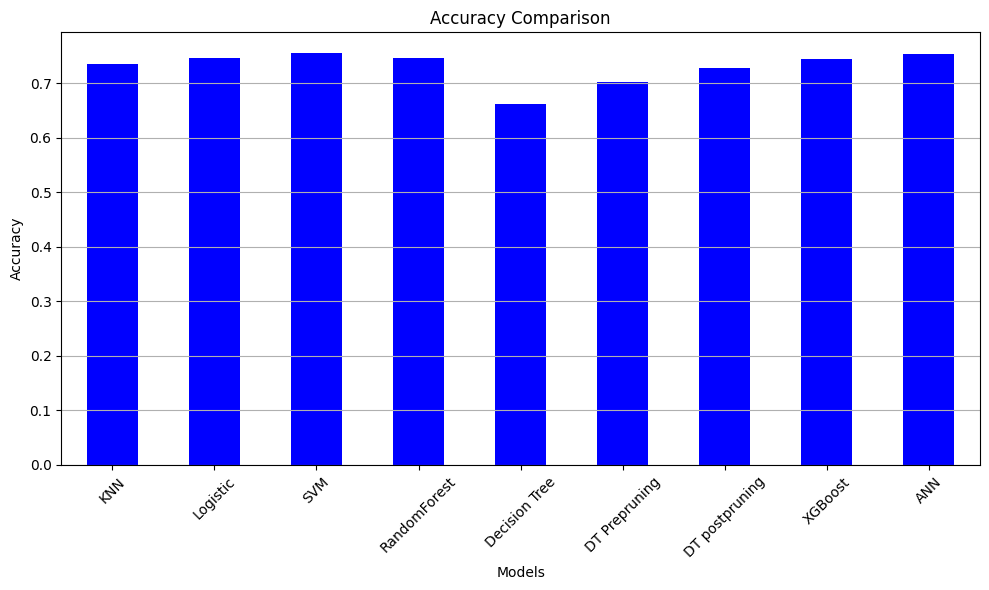

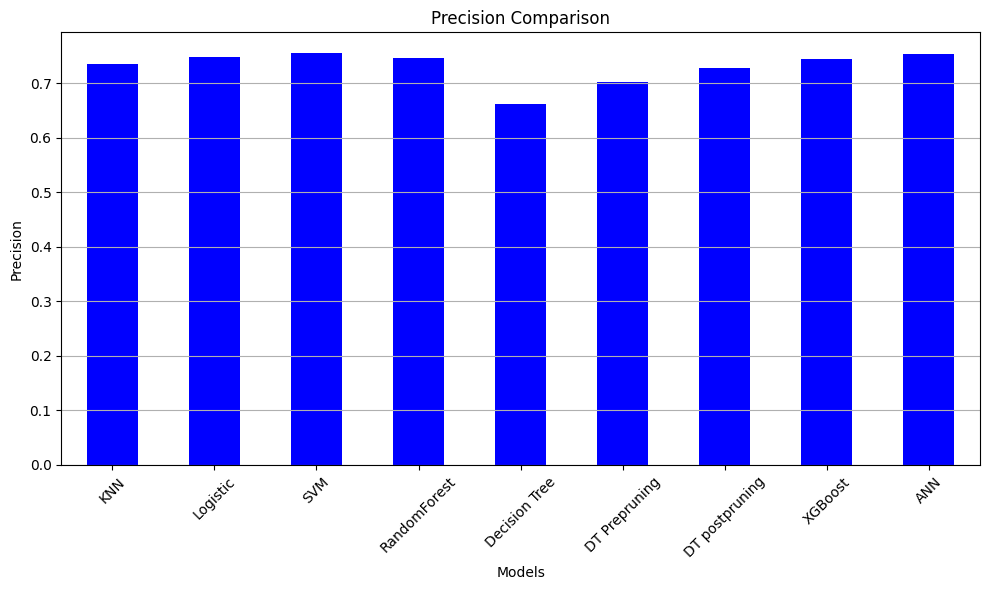

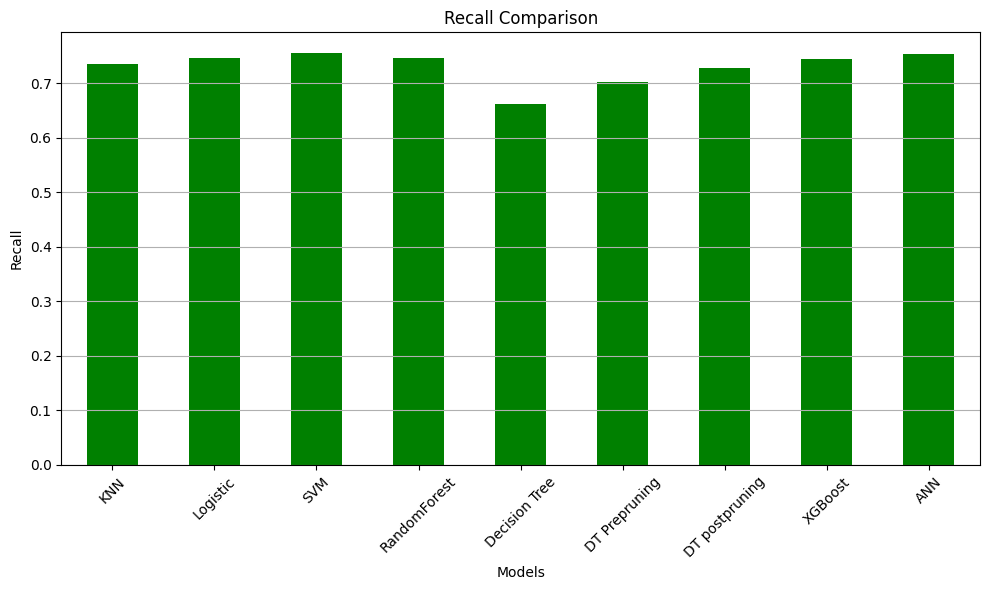

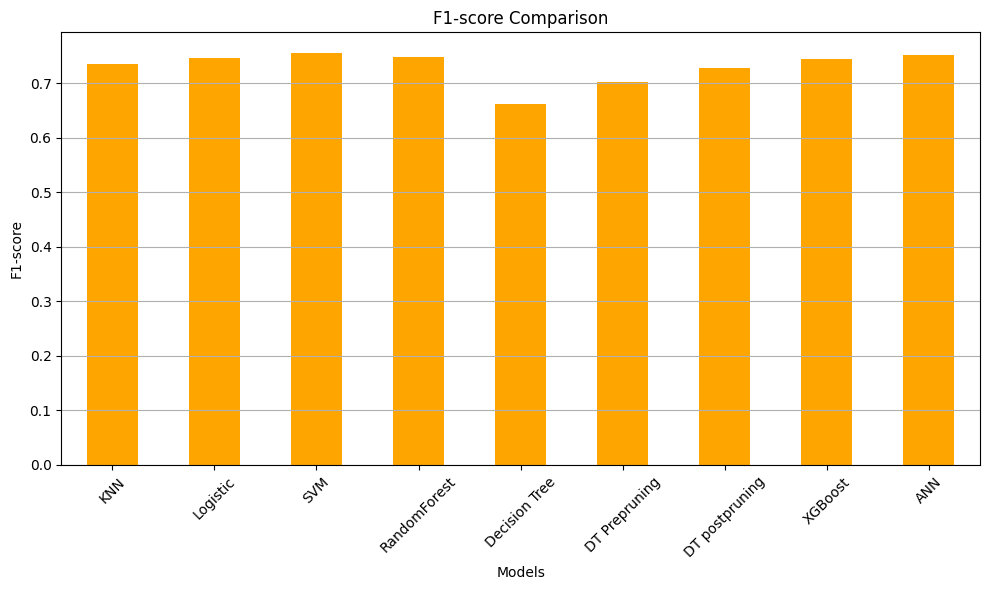

In [77]:
# Plotting Precision
plt.figure(figsize=(10, 6))
metrics_df['Accuracy'].plot(kind='bar', color='blue')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting Precision
plt.figure(figsize=(10, 6))
metrics_df['Precision'].plot(kind='bar', color='blue')
plt.title('Precision Comparison')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting Recall
plt.figure(figsize=(10, 6))
metrics_df['Recall'].plot(kind='bar', color='green')
plt.title('Recall Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting F1-score
plt.figure(figsize=(10, 6))
metrics_df['F1-score'].plot(kind='bar', color='orange')
plt.title('F1-score Comparison')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



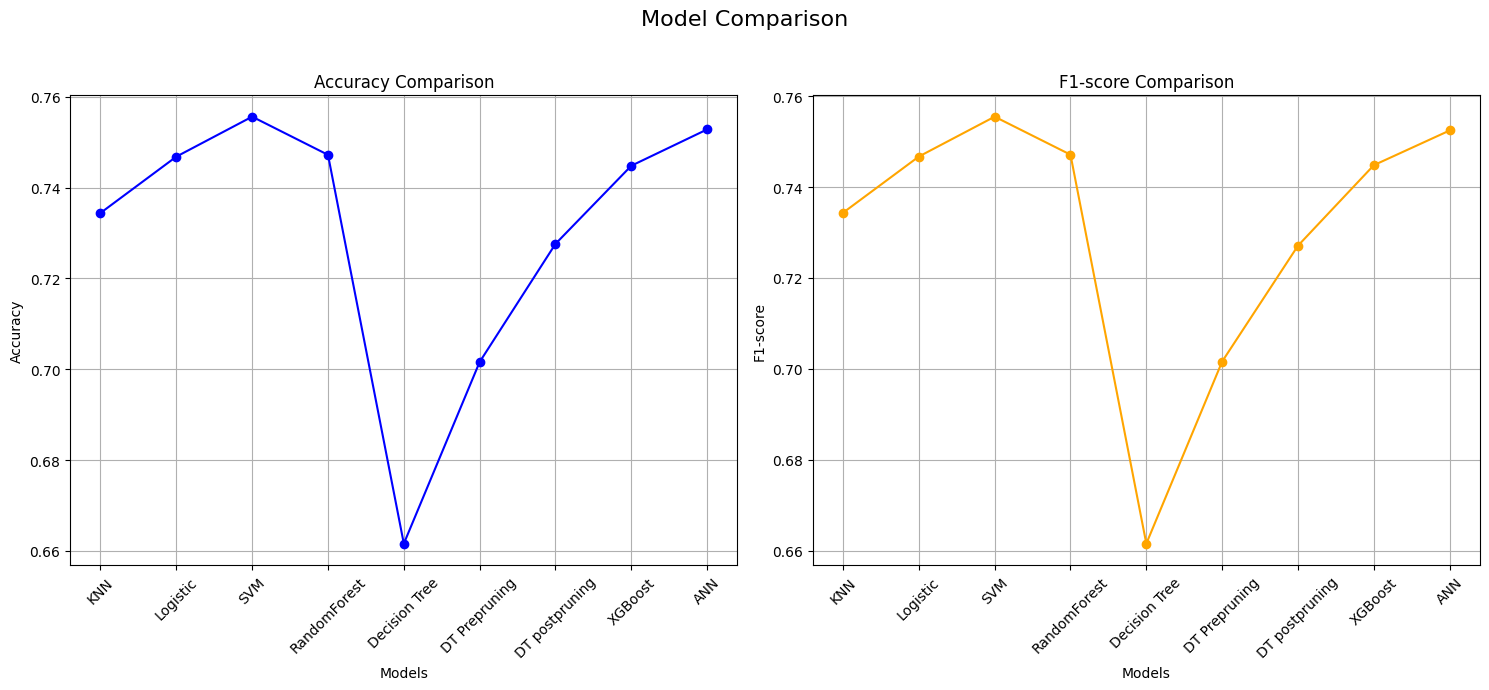

In [78]:
plt.figure(figsize=(15, 7))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(metrics_df.index, metrics_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)

# F1-score Plot
plt.subplot(1, 2, 2)
plt.plot(metrics_df.index, metrics_df['F1-score'], marker='o', linestyle='-', color='orange')
plt.title('F1-score Comparison')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.grid(True)

plt.suptitle('Model Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


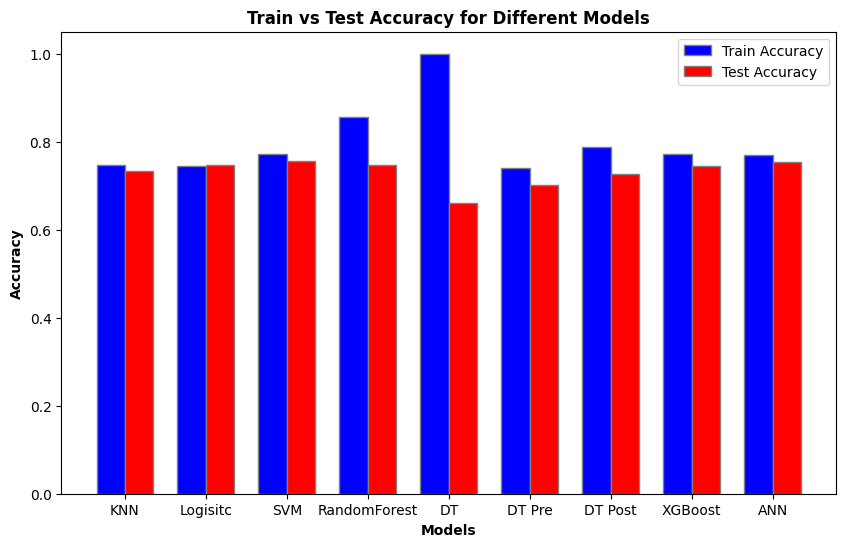

In [79]:
# Assuming these are your accuracies stored in lists
model_names = ['KNN', 'Logisitc', 'SVM', 'RandomForest' , 'DT' , 'DT Pre' , 'DT Post' , 'XGBoost' ,'ANN']
train_accuracies = [train_accuracy_knn , train_accuracy_log , train_accuracy_svm , train_accuracy_rf, train_accuracy_dt , train_accuracy_dtpre , train_accuracy_dtpost , train_accuracy_xg , train_accuracy_ann]  # Replace with your actual train accuracies
test_accuracies = [test_accuracy_knn , test_accuracy_log ,test_accuracy_svm , test_accuracy_rf, test_accuracy_dt, test_accuracy_dtpre, test_accuracy_dtpost, test_accuracy_xg, test_accuracy_ann]

# Create a DataFrame
data = {
    'Model': model_names,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
}

df = pd.DataFrame(data)

# Set the model names as the index
df.set_index('Model', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]

# Create bars
ax.bar(r1, df['Train Accuracy'], color='blue', width=bar_width, edgecolor='grey', label='Train Accuracy')
ax.bar(r2, df['Test Accuracy'], color='red', width=bar_width, edgecolor='grey', label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Train vs Test Accuracy for Different Models', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(df))])
ax.set_xticklabels(df.index)
ax.legend()

# Show the plot
plt.show()